# Exploring SDG&E Data

This data is downloaded in a different format than the other electricity grid data. Instead of line this the electric grid is in polygons. This notebook explores how to handle the polygon data.


In [1]:
# load necessary libraries
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import rasterio # utilized for raster features
import rasterio.features
from rasterio.enums import MergeAlg
from rasterio.plot import show

## SDG&E Load Capacity

In [2]:
# load SDGE load capacity data
sdge_load_capacity = gpd.read_file("../../../../capstone/electrigrid/data/utilities/sandiego_grid/ICA_MAP_PROD_LoadCapacityGrids.geojson")

In [7]:
# check the crs 
sdge_load_capacity.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [7]:
sdge_load_capacity.head()

,OBJECTID,VOLTAGE,LINE_SEGMENT_NUMBER,ICAWOF_UNIGENERATION,ICAWOF_UNILOAD,ICAWOF_PVGENERATION,OHUG,CIRCUIT_NAME,LABELTEXT,ICAWNOF_UNIGENERATION,ICAWNOF_UNILOAD,ICAWNOF_PVGENERATION,LABELTEXT_LCA,RESTRICTED,SUBID,ICAWOF_UNIGENERATION_LC,ICAWOF_UNILOAD_LC,ICAWNOF_UNIGENERATION_LC,geometry
0,31786423,12,156597,0.0,1.1,0.0,UG,597,None,0.0,1.1,0.4,1.00-1.50,N,SAN MARCOS,ICA_Operation_Flex,Load_Voltage,ICA_Voltage,"POLYGON ((-117.18286 33.10932, -117.18286 33.1..."
1,31786424,12,156597,0.0,1.1,0.0,UG,597,None,0.0,1.1,0.4,1.00-1.50,N,SAN MARCOS,ICA_Operation_Flex,Load_Voltage,ICA_Voltage,"POLYGON ((-117.18286 33.10898, -117.18286 33.1..."
2,31786425,12,156597,0.0,1.1,0.0,UG,597,None,0.0,1.1,0.4,1.00-1.50,N,SAN MARCOS,ICA_Operation_Flex,Load_Voltage,ICA_Voltage,"POLYGON ((-117.18286 33.10864, -117.18286 33.1..."
3,31786426,12,156597,0.0,1.1,0.0,UG,597,None,0.0,1.1,0.4,1.00-1.50,N,SAN MARCOS,ICA_Operation_Flex,Load_Voltage,ICA_Voltage,"POLYGON ((-117.18286 33.10829, -117.18286 33.1..."
4,31786427,12,156597,0.0,1.1,0.0,UG,597,None,0.0,1.1,0.4,1.00-1.50,N,SAN MARCOS,ICA_Operation_Flex,Load_Voltage,ICA_Voltage,"POLYGON ((-117.18286 33.10795, -117.18286 33.1..."


In [4]:
# dataframe size
sdge_load_capacity.shape

(477123, 19)

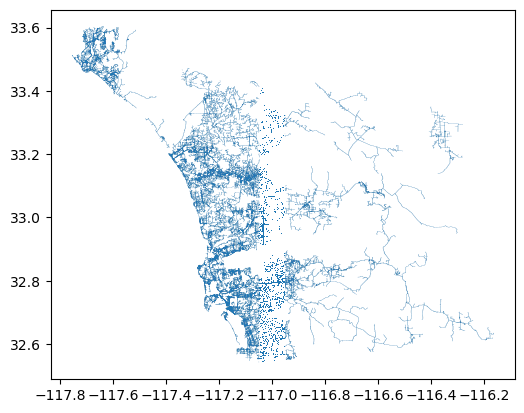

In [ ]:
# initial plot of load capacity
fig, ax = plt.subplots()

sdge_load_capacity.plot(ax=ax)

plt.show()

## SDG&E Generation Capacity

In [3]:
# load SDGE generation capacity data
sdge_generation_capacity = gpd.read_file("../../../../capstone/electrigrid/data/utilities/sandiego_grid/ICA_MAP_PROD_GenerationCapacityGrids.geojson")

In [5]:
sdge_generation_capacity.shape

(477123, 19)

In [8]:
sdge_generation_capacity.head()

,OBJECTID,VOLTAGE,LINE_SEGMENT_NUMBER,ICAWOF_UNIGENERATION,ICAWOF_UNILOAD,ICAWOF_PVGENERATION,OHUG,CIRCUIT_NAME,LABELTEXT,ICAWNOF_UNIGENERATION,ICAWNOF_UNILOAD,ICAWNOF_PVGENERATION,LABELTEXT_ICA,RESTRICTED,SUBID,ICAWOF_UNIGENERATION_LC,ICAWOF_UNILOAD_LC,ICAWNOF_UNIGENERATION_LC,geometry
0,32500971,12,189790,0.0,2.1,0.2,OH,204,None,1.1,2.1,1.3,0,N,SAN MATEO,ICA_Operation_Flex,Load_Voltage,ICA_Voltage,"POLYGON ((-117.51529 33.39328, -117.51529 33.3..."
1,32500972,12,189790,0.0,2.1,0.2,OH,204,None,1.1,2.1,1.3,0,N,SAN MATEO,ICA_Operation_Flex,Load_Voltage,ICA_Voltage,"POLYGON ((-117.51529 33.39294, -117.51529 33.3..."
2,32500973,12,189790,0.0,2.1,0.2,OH,204,None,1.1,2.1,1.3,0,N,SAN MATEO,ICA_Operation_Flex,Load_Voltage,ICA_Voltage,"POLYGON ((-117.51611 33.39362, -117.51611 33.3..."
3,32500974,12,189790,0.0,2.1,0.2,OH,204,None,1.1,2.1,1.3,0,N,SAN MATEO,ICA_Operation_Flex,Load_Voltage,ICA_Voltage,"POLYGON ((-117.51611 33.39328, -117.51611 33.3..."
4,32500975,12,846583,0.0,3.0,0.2,OH,204,None,0.1,3.0,0.7,0,N,SAN MATEO,ICA_Operation_Flex,Load_Voltage,ICA_Voltage,"POLYGON ((-117.55531 33.37352, -117.55532 33.3..."


In [9]:
# check CRS
sdge_generation_capacity.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [25]:
type(sdge_generation_capacity)

geopandas.geodataframe.GeoDataFrame

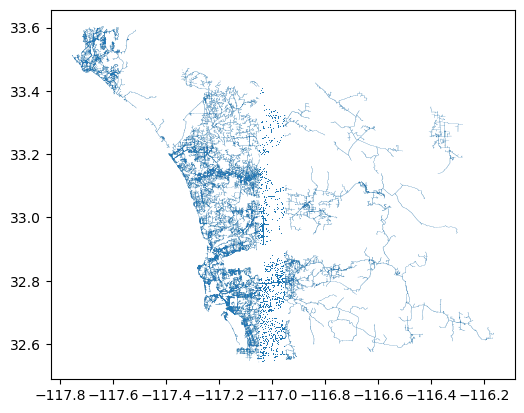

In [ ]:
# initial plot of generation capacity
fig, ax = plt.subplots()

sdge_generation_capacity.plot(ax=ax)
plt.show()

## Difference between the load and generation capacities

In [ ]:
# make sure the crs match 
assert sdge_load_capacity.crs == sdge_generation_capacity.crs

Lets see if we can find the difference between the two capacity maps. First we need to rasterize the data. 

In [ ]:
# Get list of geometries for all features in vector file
geom = [shapes for shapes in sdge_load_capacity.geometry]

In [12]:
# create a numeric unique value for each row
sdge_load_capacity['id'] = range(0,len(sdge_load_capacity))

# create tuples of geometry, value pairs, where value is the attribute value you want to burn
geom_value = ((geom,value) for geom, value in zip(sdge_load_capacity.geometry, sdge_load_capacity['id']))


In [ ]:

# Rasterize vector using the shape and transform of the raster
rasterized = rasterio.features.rasterize(geom_value,
                                out_shape = raster.shape,
                                transform = raster.transform,
                                all_touched = True,
                                fill = -5,   # background value
                                merge_alg = MergeAlg.replace,
                                dtype = int16)


In [21]:

load_gen_diff = sdge_load_capacity["ICAWOF_UNILOAD"]- sdge_generation_capacity["ICAWOF_UNILOAD"]

load_gen_diff = load_gen_diff.to_frame()

load_gen_diff["geometry"] = sdge_load_capacity["geometry"]

In [22]:
type(load_gen_diff)

pandas.core.frame.DataFrame

In [26]:
load_gen_diff = gpd.GeoDataFrame(load_gen_diff, 
                                 geometry = 'geometry')
load_gen_diff.head()

,ICAWOF_UNILOAD,geometry
0,-1.0,"POLYGON ((-117.18286 33.10932, -117.18286 33.1..."
1,-1.0,"POLYGON ((-117.18286 33.10898, -117.18286 33.1..."
2,-1.0,"POLYGON ((-117.18286 33.10864, -117.18286 33.1..."
3,-1.0,"POLYGON ((-117.18286 33.10829, -117.18286 33.1..."
4,-1.9,"POLYGON ((-117.18286 33.10795, -117.18286 33.1..."


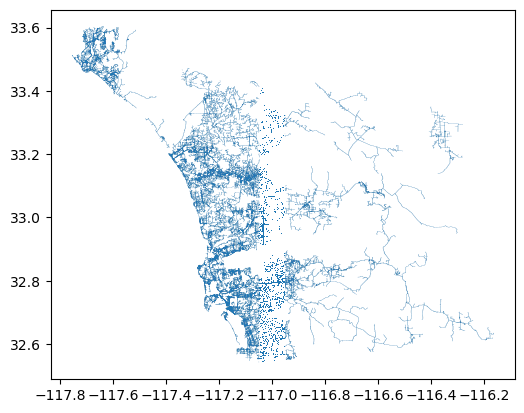

In [27]:
fig, ax = plt.subplots()

load_gen_diff.plot(ax=ax)
plt.show()